In [1]:
!pip install --upgrade numpy --user
!pip install toad --user

Requirement already up-to-date: numpy in c:\users\96075\appdata\roaming\python\python37\site-packages (1.21.6)


In [172]:
#初始设置
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import toad

In [173]:
#数据路径
train_path = 'train.csv'

In [174]:
#读取数据
df_train = pd.read_csv(train_path).iloc[:100]

In [175]:
#抽取目标列
y = df_train.pop('isDefault')

In [176]:
#查看数据集
df_train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [177]:
#查看字段类型
df_train.dtypes

id                      int64
loanAmnt              float64
term                    int64
interestRate          float64
installment           float64
grade                  object
subGrade               object
employmentTitle       float64
employmentLength       object
homeOwnership           int64
annualIncome          float64
verificationStatus      int64
issueDate              object
purpose                 int64
postCode              float64
regionCode              int64
dti                   float64
delinquency_2years    float64
ficoRangeLow          float64
ficoRangeHigh         float64
openAcc               float64
pubRec                float64
pubRecBankruptcies    float64
revolBal              float64
revolUtil             float64
totalAcc              float64
initialListStatus       int64
applicationType         int64
earliesCreditLine      object
title                 float64
policyCode            float64
n0                    float64
n1                    float64
n2        

In [178]:
#查看文本类型字段
objectcolumns = [col for col in df_train.columns if (df_train[col].dtypes == 'O')]
objectcolumns

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [179]:
#查看'employmentLength'是否仅包含'year'，以确定是否可以直接保留数字
el = df_train[~df_train['employmentLength'].isnull()]['employmentLength']
(~el.str.contains('year')).sum()

0

In [180]:
print(el[el.str.contains('<')])
print(el[(~el.str.contains('<')) & (el.str.contains('1 '))])

17    < 1 year
21    < 1 year
29    < 1 year
59    < 1 year
63    < 1 year
94    < 1 year
97    < 1 year
Name: employmentLength, dtype: object
7     1 year
22    1 year
25    1 year
51    1 year
75    1 year
93    1 year
Name: employmentLength, dtype: object


In [181]:
print(el[el.str.contains('\+')])
print(el[(el.str.contains('10')) & (~el.str.contains('\+'))])

3     10+ years
10    10+ years
13    10+ years
18    10+ years
24    10+ years
28    10+ years
33    10+ years
40    10+ years
42    10+ years
43    10+ years
46    10+ years
49    10+ years
53    10+ years
55    10+ years
60    10+ years
61    10+ years
67    10+ years
73    10+ years
79    10+ years
80    10+ years
81    10+ years
82    10+ years
85    10+ years
88    10+ years
90    10+ years
91    10+ years
92    10+ years
96    10+ years
Name: employmentLength, dtype: object
Series([], Name: employmentLength, dtype: object)


In [182]:
#查看数据缺失情况
print(df_train.isnull().sum())

id                    0
loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      3
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
policyCode            0
n0                    5
n1                    5
n2                    5
n3                    5
n4                    4
n5                    5
n6                    5
n7                    5
n8                    5
n9                    5
n10             

In [183]:
#数据清洗
x = df_train.copy().set_index('id')

In [184]:
x.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
id,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [185]:
labelencoder = LabelEncoder()

In [186]:
x['grade'] = labelencoder.fit_transform(x['grade'])

In [187]:
#高维类别特征需要进行转换
for col in ['employmentTitle', 'title']:
    labelencoder.fit(list(x[col].astype(str).values))
    x[col] = labelencoder.transform(x[col].astype(str))

In [188]:
x.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
id,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,4,E2,58,2 years,2,110000.0,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,18000.0,5,18.49,461.90,3,D2,30,5 years,0,46000.0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,12000.0,5,16.99,298.17,3,D3,56,8 years,0,74000.0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,11000.0,3,7.26,340.96,0,A4,76,10+ years,1,118000.0,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,3000.0,3,12.99,101.07,2,C2,82,NaN,1,29000.0,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [189]:
x['subGrade'] = x['subGrade'].apply(lambda x: x[-1]).astype(int) + x['grade'] * 10

In [190]:
x.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
id,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,4,42,58,2 years,2,110000.0,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,18000.0,5,18.49,461.90,3,32,30,5 years,0,46000.0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,12000.0,5,16.99,298.17,3,33,56,8 years,0,74000.0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,11000.0,3,7.26,340.96,0,4,76,10+ years,1,118000.0,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,3000.0,3,12.99,101.07,2,22,82,NaN,1,29000.0,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [191]:
def getel(x): #getel = get employmentLength
    if type(x) == float: #NaN的类型不为None，而是float
        pass
    elif '<' in x:
        return 0
    elif '+' in x:
        return 10
    else:
        return int(x[0])

In [192]:
x['employmentLength'] = x['employmentLength'].apply(getel)

In [193]:
x.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
id,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,4,42,58,2.0,2,110000.0,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,18000.0,5,18.49,461.90,3,32,30,5.0,0,46000.0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,12000.0,5,16.99,298.17,3,33,56,8.0,0,74000.0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,11000.0,3,7.26,340.96,0,4,76,10.0,1,118000.0,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,3000.0,3,12.99,101.07,2,22,82,NaN,1,29000.0,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [194]:
x['issueDate'] = x['issueDate'].apply(parse)

In [195]:
x['issueDate_Year'] = x['issueDate'].apply(lambda x: x.year)
x['issueDate_Month'] = x['issueDate'].apply(lambda x: x.month)
x['issueDate_Day'] = x['issueDate'].apply(lambda x: x.day)

x = x.drop(columns='issueDate')

In [196]:
x.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n8,n9,n10,n11,n12,n13,n14,issueDate_Year,issueDate_Month,issueDate_Day
id,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,4,42,58,2.0,2,110000.0,...,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2014,7,1
1,18000.0,5,18.49,461.90,3,32,30,5.0,0,46000.0,...,NaN,NaN,13.0,NaN,NaN,NaN,NaN,2012,8,1
2,12000.0,5,16.99,298.17,3,33,56,8.0,0,74000.0,...,5.0,3.0,11.0,0.0,0.0,0.0,4.0,2015,10,1
3,11000.0,3,7.26,340.96,0,4,76,10.0,1,118000.0,...,21.0,6.0,9.0,0.0,0.0,0.0,1.0,2015,8,1
4,3000.0,3,12.99,101.07,2,22,82,NaN,1,29000.0,...,15.0,7.0,12.0,0.0,0.0,0.0,4.0,2016,3,1


In [197]:
x['earliesCreditLine'] = x['earliesCreditLine'].apply(parse)


In [198]:
x['earliesCreditLine_Year'] = x['earliesCreditLine'].apply(lambda x: x.year)
x['earliesCreditLine_Month'] = x['earliesCreditLine'].apply(lambda x: x.month)

x = x.drop(columns='earliesCreditLine')

In [199]:
x.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n10,n11,n12,n13,n14,issueDate_Year,issueDate_Month,issueDate_Day,earliesCreditLine_Year,earliesCreditLine_Month
id,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,4,42,58,2.0,2,110000.0,...,7.0,0.0,0.0,0.0,2.0,2014,7,1,2001,8
1,18000.0,5,18.49,461.90,3,32,30,5.0,0,46000.0,...,13.0,NaN,NaN,NaN,NaN,2012,8,1,2002,5
2,12000.0,5,16.99,298.17,3,33,56,8.0,0,74000.0,...,11.0,0.0,0.0,0.0,4.0,2015,10,1,2006,5
3,11000.0,3,7.26,340.96,0,4,76,10.0,1,118000.0,...,9.0,0.0,0.0,0.0,1.0,2015,8,1,1999,5
4,3000.0,3,12.99,101.07,2,22,82,NaN,1,29000.0,...,12.0,0.0,0.0,0.0,4.0,2016,3,1,1977,8


In [200]:
#查看字段类型是否已全部转换为数值类型
x.dtypes

loanAmnt                   float64
term                         int64
interestRate               float64
installment                float64
grade                        int32
subGrade                     int32
employmentTitle              int32
employmentLength           float64
homeOwnership                int64
annualIncome               float64
verificationStatus           int64
purpose                      int64
postCode                   float64
regionCode                   int64
dti                        float64
delinquency_2years         float64
ficoRangeLow               float64
ficoRangeHigh              float64
openAcc                    float64
pubRec                     float64
pubRecBankruptcies         float64
revolBal                   float64
revolUtil                  float64
totalAcc                   float64
initialListStatus            int64
applicationType              int64
title                        int32
policyCode                 float64
n0                  

In [201]:
#缺失值处理
for col in x.columns:
    #value = x[col].mode()[0]
    #value = x[col].mean()
    value = -1
    x[col].fillna(value=value, inplace=True)

In [202]:
print(x.isnull().sum().sum())

0


In [203]:
#构建新特征
#贷款发放与信用额度开立的年份差
x['datediff'] = x['issueDate_Year'] - x['earliesCreditLine_Year']

#计算债务收入比
x['dti_cal'] = (x['loanAmnt'] / (x['annualIncome'])).replace(np.inf, np.nan)

#openAcc-totalAcc_ratio
x['openAcc_totalAcc_ratio'] = x['openAcc'].div(x['totalAcc'])

#总收入
x['totalincome'] = x['annualIncome'] * x['employmentLength']


#贷款结束年份
x['end_year'] = x['issueDate_Year'] + x['term']


In [204]:
x.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,issueDate_Year,issueDate_Month,issueDate_Day,earliesCreditLine_Year,earliesCreditLine_Month,datediff,dti_cal,openAcc_totalAcc_ratio,totalincome,end_year
id,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,4,42,58,2.0,2,110000.0,...,2014,7,1,2001,8,13,0.318182,0.259259,220000.0,2019
1,18000.0,5,18.49,461.90,3,32,30,5.0,0,46000.0,...,2012,8,1,2002,5,10,0.391304,0.722222,230000.0,2017
2,12000.0,5,16.99,298.17,3,33,56,8.0,0,74000.0,...,2015,10,1,2006,5,9,0.162162,0.407407,592000.0,2020
3,11000.0,3,7.26,340.96,0,4,76,10.0,1,118000.0,...,2015,8,1,1999,5,16,0.093220,0.321429,1180000.0,2018
4,3000.0,3,12.99,101.07,2,22,82,-1.0,1,29000.0,...,2016,3,1,1977,8,39,0.103448,0.444444,-29000.0,2019


In [205]:
#筛选特征
iv_info = toad.quality(x, y, iv_only=True)

In [206]:
iv_info

,iv,gini,entropy,unique
annualIncome,1.630818,NaN,NaN,65.0
interestRate,1.599199,NaN,NaN,75.0
totalincome,1.338931,NaN,NaN,78.0
postCode,1.302697,NaN,NaN,85.0
installment,1.284369,NaN,NaN,98.0
openAcc_totalAcc_ratio,1.241685,NaN,NaN,75.0
subGrade,1.202018,NaN,NaN,25.0
revolUtil,1.187067,NaN,NaN,93.0
n10,1.093555,NaN,NaN,24.0
grade,1.073035,NaN,NaN,6.0


In [207]:
#提取高相关特征
high_corr_feature = [col for col in iv_info[iv_info['iv'] >= 0.9].index]

feature = [col for col in x.columns if col  in (high_corr_feature )]
feature

['loanAmnt',
 'interestRate',
 'installment',
 'grade',
 'subGrade',
 'annualIncome',
 'postCode',
 'dti',
 'revolUtil',
 'n8',
 'n10',
 'dti_cal',
 'openAcc_totalAcc_ratio',
 'totalincome']

In [208]:
x = x[feature]

In [209]:
#归一化
scaler = StandardScaler()

In [210]:
x_std = pd.DataFrame(scaler.fit_transform(x), index=x.index, columns=x.columns)

In [211]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, train_size=0.7)

In [212]:
import copy
from math import log
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'SimHei'  # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


class DecisionTree(object):
    def __init__(self, decision_tree_type='CART', feature_list=None):
        self.decision_tree_type = decision_tree_type
        self.feature_list = feature_list

    @staticmethod
    def compute_entropy(x, y):
        """
        计算给定数据的信息熵 H(S) = -SUM(P*logP)
        :param x:
        :param y:
        :return:
        """
        sample_num = len(x)
        label_counter = Counter(y)
        dataset_entropy = 0.0
        for key in label_counter:
            prob = float(label_counter[key]) / sample_num
            dataset_entropy -= prob * log(prob, 2)  # get the log value

        return dataset_entropy

    def dataset_split_by_id3(self, x, y):
        """
        选择最好的数据集划分方式
        ID3算法：选择信息熵增益最大
        C4.5算法：选择信息熵增益比最大
        :param x:
        :param y:
        :return:
        """
        feature_num = len(x[0])
        base_entropy = self.compute_entropy(x, y)
        best_info_gain, best_info_gain_ratio = 0.0, 0.0
        best_feature_idx = -1
        for i in range(feature_num):
            unique_features = set([example[i] for example in x])
            new_entropy, split_entropy = 0.0, 0.0
            for feature in unique_features:
                sub_dataset, sub_labels = [], []
                for featVec, label in zip(x, y):
                    if featVec[i] == feature:
                        sub_dataset.append(list(featVec[:i]) + list(featVec[i + 1:]))
                        sub_labels.append(label)

                prob = len(sub_dataset) / float(len(x))
                new_entropy += prob * self.compute_entropy(sub_dataset, sub_labels)

            info_gain = base_entropy - new_entropy
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_feature_idx = i

        return best_feature_idx

    def dataset_split_by_c45(self, x, y):
        """
        选择最好的数据集划分方式
        C4.5算法：选择信息熵增益比最大
        :param x:
        :param y:
        :return:
        """
        feature_num = len(x[0])
        base_entropy = self.compute_entropy(x, y)
        best_info_gain, best_info_gain_ratio = 0.0, 0.0
        best_feature_idx = -1
        for i in range(feature_num):
            unique_features = set([example[i] for example in x])
            new_entropy, split_entropy = 0.0, 0.0
            for feature in unique_features:
                sub_dataset, sub_labels = [], []
                for featVec, label in zip(x, y):
                    if featVec[i] == feature:
                        sub_dataset.append(list(featVec[:i]) + list(featVec[i + 1:]))
                        sub_labels.append(label)

                prob = len(sub_dataset) / float(len(x))
                new_entropy += prob * self.compute_entropy(sub_dataset, sub_labels)

                split_entropy += -prob * log(prob, 2)

            info_gain = base_entropy - new_entropy
            info_gain_ratio = info_gain / split_entropy if split_entropy else 0.0
            if info_gain_ratio > best_info_gain_ratio:
                best_info_gain_ratio = info_gain_ratio
                best_feature_idx = i

        return best_feature_idx

    def create_tree_by_id3_and_c45(self, x, y, feature_list=None):
        """
        创建决策树
        :param x:
        :param y:
        :param feature_list:
        :return:
        """
        # the type is the same, so stop classify
        if len(set(y)) <= 1:
            return y[0]
        # traversal all the features and choose the most frequent feature
        if len(x[0]) == 1:
            return Counter(y).most_common(1)

        feature_list = [i for i in range(len(y))] if not feature_list else feature_list
        if self.decision_tree_type == 'ID3':
            best_feature_idx = self.dataset_split_by_id3(x, y)
        elif self.decision_tree_type == 'C45':
            best_feature_idx = self.dataset_split_by_c45(x, y)
        else:
            raise KeyError
        best_feature = feature_list[int(best_feature_idx)]  # 最佳特征
        decision_tree = {best_feature: {}}
        # feature_list = feature_list[:best_feature_idx] + feature_list[best_feature_idx + 1:]
        feature_list.pop(int(best_feature_idx))
        # get the list which attain the whole properties
        best_feature_values = set([sample[best_feature_idx] for sample in x])
        for value in best_feature_values:
            sub_dataset, sub_labels = [], []
            for featVec, label in zip(x, y):
                if featVec[best_feature_idx] == value:
                    sub_dataset.append(list(featVec[:best_feature_idx]) + list(featVec[best_feature_idx + 1:]))
                    sub_labels.append(label)

            decision_tree[best_feature][value] = self.create_tree_by_id3_and_c45(sub_dataset, sub_labels, feature_list)

        return decision_tree

    @staticmethod
    def compute_gini(x, y):
        """
        计算数据集x的基尼指数
        :param x: 数据集
        :param y: 数据集对应的类别标签
        :return: 该数据集的gini指数
        """
        unique_labels = set(y)
        sample_num = len(x)  # y总数据条数
        gini = 1.0
        for label in unique_labels:
            gini_k = len(x[y == label]) / sample_num  # y中每一个分类的概率（其实就是频率）
            gini -= gini_k ** 2
        return gini

    def dataset_split_by_cart(self, x, y):
        """
        选择最好的特征划分数据集，即返回最佳特征下标
        :param x:
        :param y:
        :return:
        """
        sample_num, feature_num = x.shape
        column_feature_gini = {}  # 初始化参数，记录每一列x的每一种特征的基尼 Gini(D,A)
        for i in range(feature_num):  # 遍历所有x特征列
            column_i = dict(Counter(x[:, i]))  # 使用Counter函数计算这一列x各特征数量
            for value in column_i.keys():  # 循环这一列的特征，计算H(D|A)
                # 对某一列x中，会出现x=是，y=是的特殊情况，这种情况下按“是”、“否”切分数据得到的Gini都一样，
                # 设置此参数将所有特征都乘以一个比1大一点点的值，但按某特征划分Gini为0时，设置为1
                best_flag = 1.00001
                cls_same, cls_diff = x[:, i] == value, x[:, i] != value
                sub_x1, sub_y1 = x[cls_same], y[cls_same]
                sub_x2, sub_y2 = x[cls_diff], y[cls_diff]
                sublen1, sublen2 = len(sub_x1), len(sub_x2)
                # 判断按此特征划分Gini值是否为0（全部为一类）
                if (sublen1 / sample_num) * self.compute_gini(sub_x1, sub_y1) == 0:
                    best_flag = 1
                feaGini = (sublen1 / sample_num) * self.compute_gini(sub_x1, sub_y1) + \
                          (sublen2 / sample_num) * self.compute_gini(sub_x2, sub_y2)
                column_feature_gini[(i, value)] = feaGini * best_flag

        # 找到最小的Gini指数益对应的数据列
        best_feature_and_idx = min(column_feature_gini, key=column_feature_gini.get)

        return best_feature_and_idx, column_feature_gini

    def create_tree_by_cart(self, x, y, feature_list=None):
        """
        输入：训练数据集D，特征集A，阈值ε
        输出：决策树T
        """
        y_lables = np.unique(y)

        # 1、如果数据集D中的所有实例都属于同一类label（Ck），则T为单节点树，并将类label（Ck）作为该结点的类标记，返回T
        if len(set(y_lables)) == 1:
            return y_lables[0]

        # 2、若特征集A=空，则T为单节点，并将数据集D中实例树最大的类label（Ck）作为该节点的类标记，返回T
        if len(x[0]) == 0:
            labelCount = dict(Counter(y_lables))
            return max(labelCount, key=labelCount.get)

        # 3、否则，按CART算法就计算特征集A中各特征对数据集D的Gini，选择Gini指数最小的特征bestFeature（Ag）进行划分
        best_feature_and_idx, _ = self.dataset_split_by_cart(x, y)

        feature_list = [i for i in range(len(x[0]))] if not feature_list else feature_list
        best_feature_idx = feature_list[int(best_feature_and_idx[0])]  # 最佳特征

        decision_tree = {best_feature_idx: {}}  # 构建树，以Gini指数最小的特征bestFeature为子节点
        # feature_list = feature_list[:best_feature_idx] + feature_list[best_feature_idx + 1:]
        feature_list.pop(int(best_feature_and_idx[0]))

        # 使用beatFeature进行划分，划分产生2个节点，成树T，返回T
        y_lables_split = y[list(x[:, int(best_feature_and_idx[0])] == best_feature_and_idx[1])]  # 获取按此划分后y数据列表
        y_lables_grp = Counter(y_lables_split)  # 统计最优划分应该属于哪个i叶子节点“是”、“否”
        y_leaf = y_lables_grp.most_common(1)[0][0]  # 获得划分后出现概率最大的y分类
        decision_tree[best_feature_idx][best_feature_and_idx[1]] = y_leaf  # 设定左枝叶子值

        # 4、删除此最优划分数据x列，使用其他x列数据，递归地调用步1-3，得到子树Ti，返回Ti
        sub_x = np.delete(x, int(best_feature_and_idx[0]), axis=1)  # 删除此最优划分x列，使用剩余的x列进行数据划分
        # 判断右枝类型，划分后的左右枝“是”、“否”是不一定的，所以这里进行判断
        y1 = y_lables[0]  # CART树y只能有2个分类
        y2 = y_lables[1]
        if y_leaf == y1:
            decision_tree[best_feature_idx][y2] = self.create_tree_by_cart(sub_x, y, feature_list)
        elif y_leaf == y2:
            decision_tree[best_feature_idx][y1] = self.create_tree_by_cart(sub_x, y, feature_list)

        return decision_tree

    def train(self, x, y):
        x, y = np.array(x), np.array(y)
        if self.decision_tree_type in ('ID3', 'C45'):
            return self.create_tree_by_id3_and_c45(x, y, feature_list=copy.deepcopy(self.feature_list))
        elif self.decision_tree_type == 'CART':
            return self.create_tree_by_cart(x, y, feature_list=copy.deepcopy(self.feature_list))
        else:
            raise KeyError

    def predict(self, tree, x):
        """
        决策树预测
        :param tree:
        :param x:
        :return:
        """
        root = list(tree.keys())[0]
        root_dict = tree[root]
        for key, value in root_dict.items():
            if x[root if not self.feature_list else self.feature_list.index(root)] == key:
                if isinstance(value, dict):
                    _label = self.predict(value, x)
                else:
                    _label = value

                return _label

        raise KeyError

    def getNumLeafs(self, myTree):
        numLeafs = 0
        firstStr = list(myTree.keys())[0]
        secondDict = myTree[firstStr]
        for key in secondDict.keys():
            if isinstance(secondDict[key], dict):  # test to see if the nodes are dictonaires, if not they are leaf nodes
                numLeafs += self.getNumLeafs(secondDict[key])
            else:
                numLeafs += 1
        return numLeafs

    def getTreeDepth(self, myTree):
        maxDepth = 0
        firstStr = list(myTree.keys())[0]  # myTree.keys()[0]
        secondDict = myTree[firstStr]
        for key in secondDict.keys():
            if isinstance(secondDict[key], dict):  # test to see if the nodes are dictonaires, if not they are leaf nodes
                thisDepth = 1 + self.getTreeDepth(secondDict[key])
            else:
                thisDepth = 1
            if thisDepth > maxDepth: maxDepth = thisDepth
        return maxDepth

    def plotNode(self, nodeTxt, centerPt, parentPt, nodeType):
        self.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                                xytext=centerPt, textcoords='axes fraction',
                                va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

    def plotMidText(self, cntrPt, parentPt, txtString):
        xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
        yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
        self.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

    def plotTree(self, myTree, parentPt, nodeTxt):  # if the first key tells you what feat was split on
        numLeafs = self.getNumLeafs(myTree)  # this determines the x width of this tree
        # depth = getTreeDepth(myTree)
        firstStr = list(myTree.keys())[0]  # myTree.keys()[0]     #the text label for this node should be this
        cntrPt = (self.xOff + (1.0 + float(numLeafs)) / 2.0 / self.totalW, self.yOff)
        self.plotMidText(cntrPt, parentPt, nodeTxt)
        self.plotNode(firstStr, cntrPt, parentPt, decisionNode)
        secondDict = myTree[firstStr]
        self.yOff = self.yOff - 1.0 / self.totalD
        for key in secondDict.keys():
            if isinstance(secondDict[key], dict):  # test to see if the nodes are dictonaires, if not they are leaf nodes
                self.plotTree(secondDict[key], cntrPt, str(key))  # recursion
            else:  # it's a leaf node print the leaf node
                self.xOff = self.xOff + 1.0 / self.totalW
                self.plotNode(secondDict[key], (self.xOff, self.yOff), cntrPt, leafNode)
                self.plotMidText((self.xOff, self.yOff), cntrPt, str(key))
        self.yOff = self.yOff + 1.0 / self.totalD

    def createPlot(self, myTree):
        fig = plt.figure(figsize=(30, 12),facecolor='white')
        fig.clf()
        axprops = dict(xticks=[], yticks=[])
        self.ax1 = plt.subplot(111, frameon=False, **axprops)  # no ticks
        # createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses
        self.totalW = float(self.getNumLeafs(myTree))
        self.totalD = float(self.getTreeDepth(myTree))
        self.xOff = -0.5 / self.totalW
        self.yOff = 1.0
        self.plotTree(myTree, (0.5, 1.0), '')
        plt.show()



{'revolUtil': {0.0: 0, 4.9: 0, 6.8: 1, 7.8: 0, 8.0: 0, 9.3: 0, 8.5: 0, 11.7: 0, 12.9: 0, 53.1: 1, 53.5: 0, 18.6: 0, 20.1: 0, 21.2: 0, 23.0: 0, 25.9: 0, 29.3: 0, 30.6: 0, 31.1: 0, 57.0: 0, 33.9: 0, 30.5: 0, 35.7: 0, 36.1: 0, 38.8: 1, 40.0: 0, 40.7: 0, 44.4: 0, 44.6: 0, 46.0: 1, 47.9: 0, 47.5: 0, 49.1: 0, 47.7: 1, 49.9: 1, 47.4: 1, 48.7: 0, 51.8: 0, 55.1: 0, 56.7: 1, 57.4: 1, 58.9: 0, 58.2: 1, 60.4: 0, 58.1: 0, 59.7: 0, 61.1: 0, 0.1: 0, 63.9: 0, 66.5: 0, 58.4: 0, 68.8: 0, 61.0: 0, 66.3: 0, 72.4: 0, 75.7: 0, 76.9: 1, 75.8: 0, 78.4: 1, 84.0: 1, 85.5: 1, 87.6: 0, 90.6: 0, 91.8: 0, 93.0: 0, 44.5: 0, 48.9: 1}}


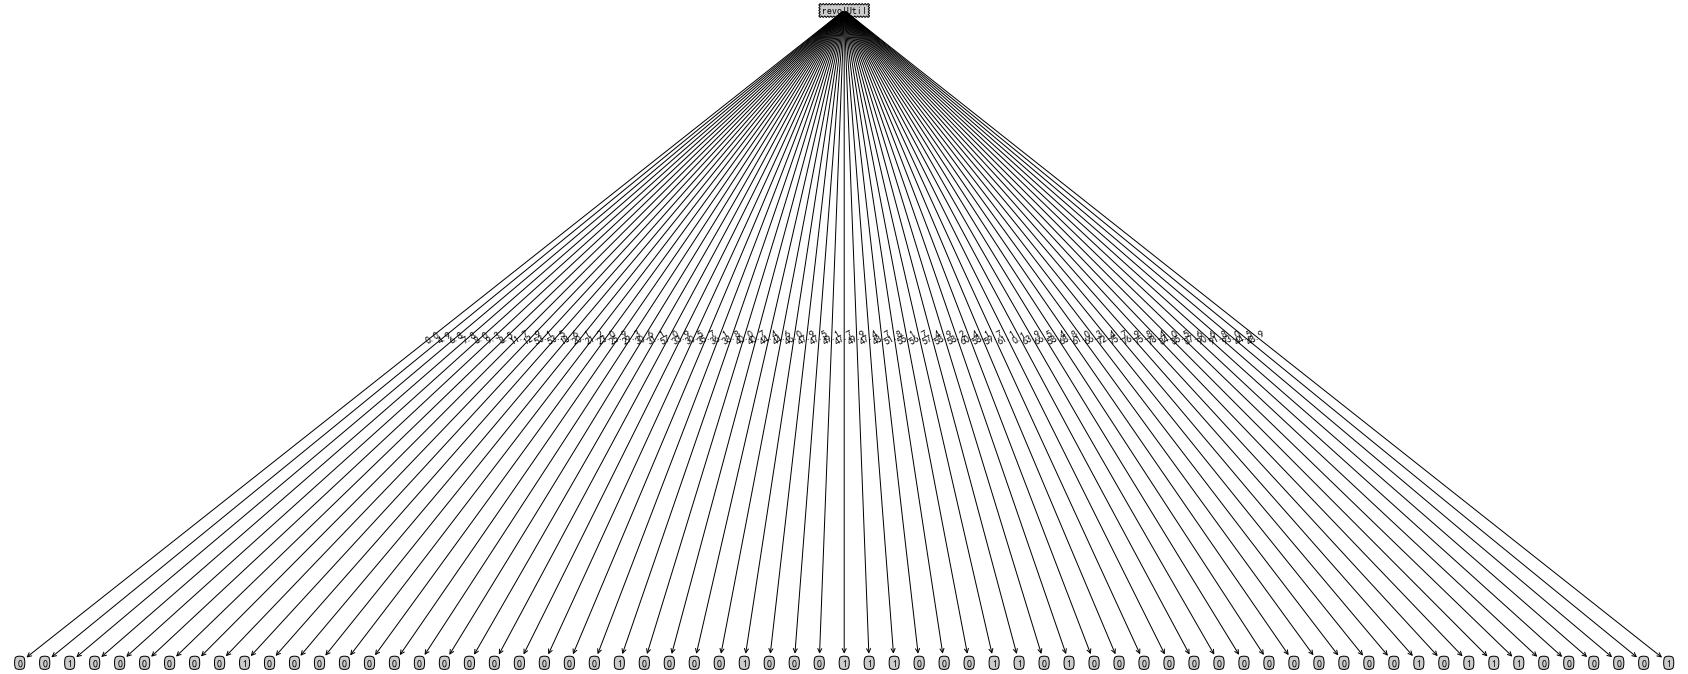

准确率为: 0.6666666666666666
耗费时间为: 1.8288815021514893


In [213]:
import time
s1 = time.time()
dt = DecisionTree(decision_tree_type='C45',feature_list=['loanAmnt','interestRate','installment','grade','subGrade','annualIncome','postCode','dti','revolUtil','n8','n10'])
myTree = dt.train(x_train.values.tolist(), y_train.values.tolist())
print(myTree)
dt.createPlot(myTree)
score = 0
sum_number = len(y_cv.values.tolist())
# 对预测数据进行比对
for x, y in zip(x_cv.values.tolist(), y_cv.values.tolist()):
    try:
        if dt.predict(myTree, x) == y:
            score += 1
    except:
        sum_number -= 1 
# 输出准确率
print('准确率为:',score / sum_number)
print('耗费时间为:',time.time()-s1)

In [216]:
print(x_train.values.tolist()[0:10])

[[16000.0, 14.16, 373.63, 2.0, 22.0, 120000.0, 495.0, 34.77, 18.6, 27.0, 12.0, 0.13333333333333333, 0.3076923076923077, 1200000.0], [7000.0, 11.99, 232.47, 1.0, 15.0, 55000.0, 141.0, 3.37, 49.1, 12.0, 9.0, 0.12727272727272726, 0.75, 550000.0], [35000.0, 18.45, 897.37, 3.0, 32.0, 130020.0, 54.0, 17.92, 6.8, 23.0, 54.0, 0.2691893554837717, 0.6923076923076923, 1300200.0], [14400.0, 7.89, 450.52, 0.0, 5.0, 55000.0, 504.0, 25.6, 40.0, 23.0, 10.0, 0.26181818181818184, 0.2702702702702703, 440000.0], [15000.0, 15.99, 364.7, 2.0, 25.0, 76000.0, 248.0, 16.56, 47.9, 11.0, 11.0, 0.19736842105263158, 0.6111111111111112, 152000.0], [24000.0, 9.99, 774.3, 1.0, 13.0, 150000.0, 134.0, 5.68, 68.8, 17.0, 7.0, 0.16, 0.28, 1500000.0], [6500.0, 9.49, 208.19, 1.0, 12.0, 26500.0, 414.0, 15.63, 58.2, 2.0, 8.0, 0.24528301886792453, 0.5, 106000.0], [4000.0, 23.99, 156.92, 4.0, 42.0, 91000.0, 616.0, 13.64, 58.9, 19.0, 10.0, 0.04395604395604396, 0.4, 910000.0], [5600.0, 13.67, 190.5, 1.0, 15.0, 38000.0, 134.0, 14.

In [163]:
!pip install graphviz -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


{'subGrade': {32.0: 1, 5.0: 0, 42.0: 0, 12.0: 1, 13.0: 0, 15.0: 0, 22.0: 0, 25.0: 0}}


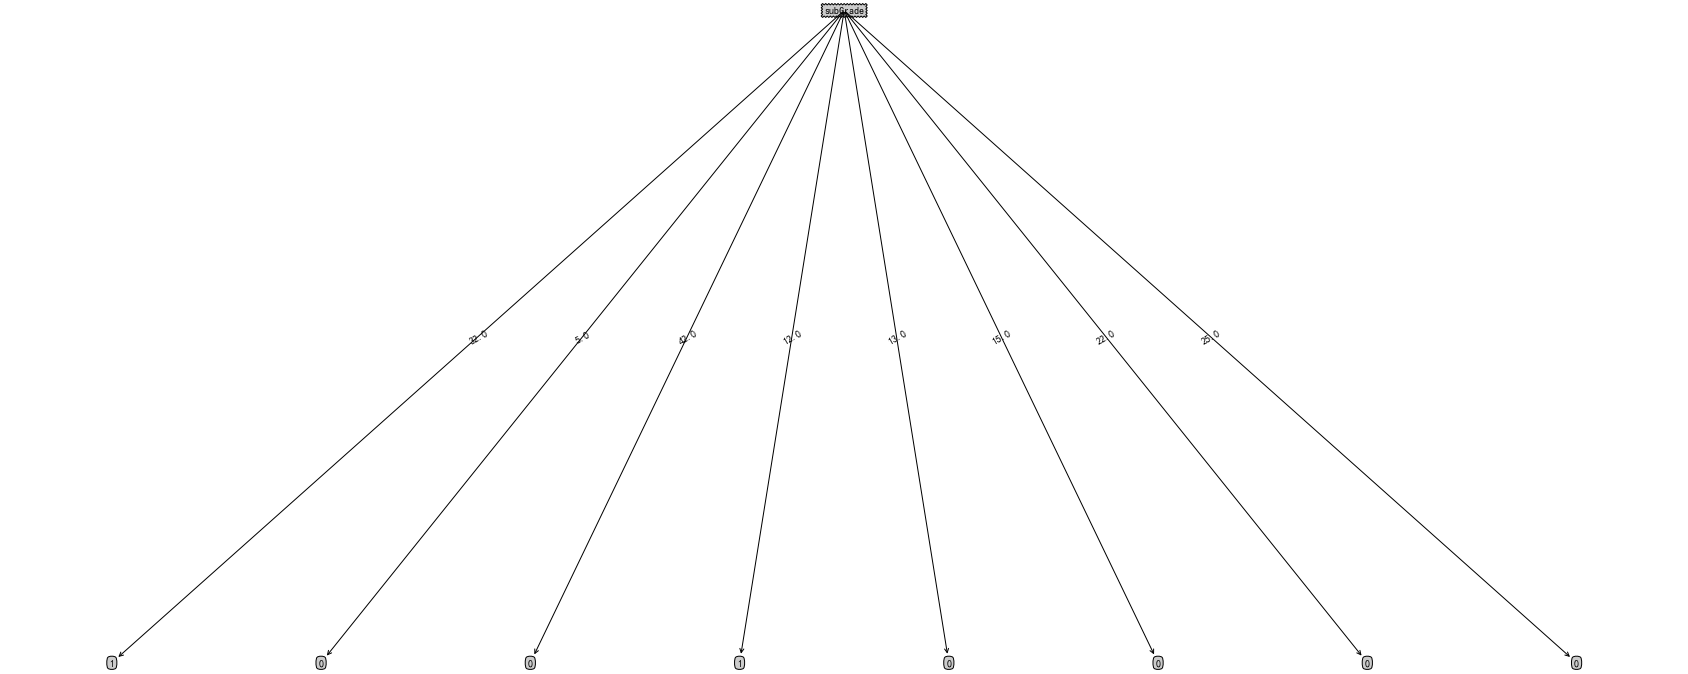

In [218]:
X = x_train.values.tolist()[0:10]
Y = y_train.values.tolist()[0:10]

dt = DecisionTree(decision_tree_type='C45', feature_list=['loanAmnt','interestRate','installment','grade','subGrade','annualIncome','postCode','dti','revolUtil','n8','n10'])
myTree = dt.train(X, Y)
print(myTree)
dt.createPlot(myTree)